<a href="https://colab.research.google.com/github/10-ThiagoB82/Projetos-Publico/blob/main/Marketing_Digital(E_COMMERCE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

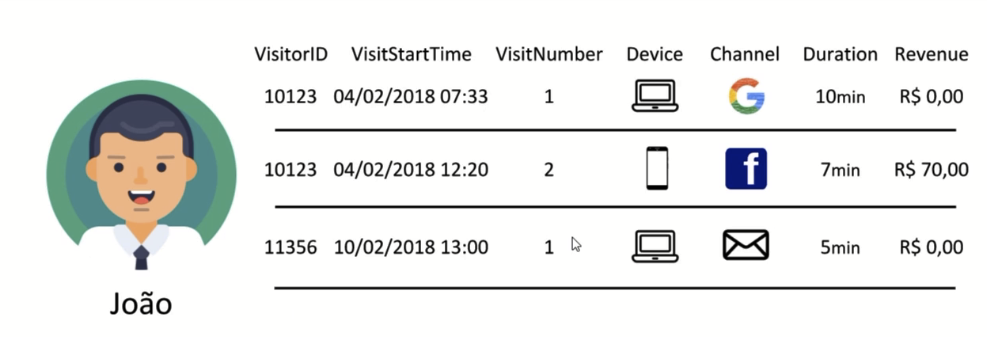

**Marketing Analytics :**


*   Preparação dos Dados:
      Analisar os dados de comportamento online.
      Limpando base de dados.
      Transformar dados em formato JSON.




*   Feature Engineering:
      Analisar variáveis de usuários.
      Criar,Tratar e Agrupar as variáveis.

*   Feature Engineering:
      Analisar variáveis de usuários.
      Criar,Tratar e Agrupar as variáveis.

*   Treinando o Modelo:
      Treino e teste.
      Treinando uma regressão linear.
      Análise gráfica dos resultados.

*   Melhorando Feature Engineering:
      Criando variáveis qualitativas.
      Limpando a base de dados.
      Criando variáveis diversas.
      Slicing.

*   Aplicado o Gradient Boosting para prever quanto um usuário irá gastar:
      Identificando os tipos das colunas.
      Label encoder.
      Variáveis categóricas.
      Treinando uma regressão linear.
      Treinando um gradient boosting.


*   Conclusão:
      Conseguimos prever o quanto um usuário gastou em sua visita ao Site.







    
 





# Data Prep

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
df.shape

(12283, 12)

In [ ]:
len(df.fullVisitorId.unique())

9996

In [ ]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [ ]:
df = pd.read_csv('train.csv', dtype={'date':object,'fullVisitorId':object,'VisitId':object})

In [ ]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
df.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [ ]:
type(df.device.iloc[0])

str

In [ ]:
import json

In [ ]:
type(json.loads(df.device.iloc[0]))

dict

In [ ]:
json.loads(df.device.iloc[0])

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [ ]:
pd.DataFrame([json.loads(linha) for linha in df.device])

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
0,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Safari,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Safari,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,not available in demo dataset,not available in demo dataset
5,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
6,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
7,Chrome,not available in demo dataset,not available in demo dataset,tablet,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset
8,Safari,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,not available in demo dataset,not available in demo dataset
9,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availa

In [ ]:
dicionarios = ['device','geoNetwork','trafficSource','totals']

In [ ]:
for coluna in dicionarios:
    df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,keyword,medium,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,(not provided),organic,NaN,google,1,1,1,1,NaN,1
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,(not provided),organic,NaN,google,1,1,1,1,NaN,1
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,affiliate,NaN,Partners,1,1,1,1,NaN,1
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,(not provided),organic,NaN,google,1,1,NaN,1,NaN,1
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,(not provided),organic,NaN,google,NaN,5,1,4,NaN,1


In [ ]:
df.drop(dicionarios, axis=1, inplace=True)

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserSize,...,keyword,medium,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,(not provided),organic,NaN,google,1,1,1,1,NaN,1
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,(not provided),organic,NaN,google,1,1,1,1,NaN,1
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,affiliate,NaN,Partners,1,1,1,1,NaN,1
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,(not provided),organic,NaN,google,1,1,NaN,1,NaN,1
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,(not provided),organic,NaN,google,NaN,5,1,4,NaN,1


# Limpando os dados

In [ ]:
df.drop('adwordsClickInfo',axis=1,inplace=True)

In [ ]:
coluna_na = []
for coluna in df.columns:
    print(coluna + ': ' + str(len(df[coluna].unique())))
    if len(df[coluna].unique()) == 1:
        coluna_na.append(coluna)

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserSize: 1
browserVersion: 1
deviceCategory: 3
flashVersion: 1
isMobile: 2
language: 1
mobileDeviceBranding: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
mobileDeviceModel: 1
mobileInputSelector: 1
operatingSystem: 12
operatingSystemVersion: 1
screenColors: 1
screenResolution: 1
city: 296
cityId: 1
continent: 6
country: 145
latitude: 1
longitude: 1
metro: 53
networkDomain: 1747
networkLocation: 1
region: 212
subContinent: 22
adContent: 16
campaign: 7
campaignCode: 2
isTrueDirect: 2
keyword: 129
medium: 7
referralPath: 198
source: 76
bounces: 2
hits: 96
newVisits: 2
pageviews: 75
transactionRevenue: 147
visits: 1


In [ ]:
coluna_na

['socialEngagementType',
 'browserSize',
 'browserVersion',
 'flashVersion',
 'language',
 'mobileDeviceBranding',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'mobileDeviceModel',
 'mobileInputSelector',
 'operatingSystemVersion',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [ ]:
len(coluna_na)

18

In [ ]:
df.drop(coluna_na,axis=1,inplace=True)

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,...,isTrueDirect,keyword,medium,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,desktop,False,...,NaN,NaN,affiliate,NaN,Partners,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,mobile,True,...,True,(not provided),organic,NaN,google,1,1,NaN,1,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,mobile,True,...,NaN,(not provided),organic,NaN,google,NaN,5,1,4,NaN


In [ ]:
df.shape

(12283, 31)

In [ ]:
df.dtypes

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId                int64
visitNumber            int64
visitStartTime         int64
browser               object
deviceCategory        object
isMobile                bool
operatingSystem       object
city                  object
continent             object
country               object
metro                 object
networkDomain         object
region                object
subContinent          object
adContent             object
campaign              object
campaignCode          object
isTrueDirect          object
keyword               object
medium                object
referralPath          object
source                object
bounces               object
hits                  object
newVisits             object
pageviews             object
transactionRevenue    object
dtype: object

In [ ]:
quant = ['bounces', 'hits','newVisits','pageviews', 'transactionRevenue']

In [ ]:
for coluna in quant:
    df[coluna] = pd.to_numeric(df[coluna])

In [ ]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                 int64
visitNumber             int64
visitStartTime          int64
browser                object
deviceCategory         object
isMobile                 bool
operatingSystem        object
city                   object
continent              object
country                object
metro                  object
networkDomain          object
region                 object
subContinent           object
adContent              object
campaign               object
campaignCode           object
isTrueDirect           object
keyword                object
medium                 object
referralPath           object
source                 object
bounces               float64
hits                    int64
newVisits             float64
pageviews               int64
transactionRevenue    float64
dtype: object

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,...,isTrueDirect,keyword,medium,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,1.0,1,1.0,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,1.0,1,1.0,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,desktop,False,...,NaN,NaN,affiliate,NaN,Partners,1.0,1,1.0,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,mobile,True,...,True,(not provided),organic,NaN,google,1.0,1,NaN,1,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,mobile,True,...,NaN,(not provided),organic,NaN,google,NaN,5,1.0,4,NaN


In [ ]:
df.transactionRevenue.fillna(0, inplace=True)

In [ ]:
df.transactionRevenue = df.transactionRevenue / 1000000

In [ ]:
df.shape

(12283, 31)

In [ ]:
len(set(df.fullVisitorId))

9997

# Feature Engineering

In [ ]:
df_quant = df.groupby('fullVisitorId',as_index=False)[quant].sum()

In [ ]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [ ]:
df_quant.shape

(9997, 6)

# Separando as bases

In [ ]:
y = df_quant.transactionRevenue.copy()

In [ ]:
X = df_quant.drop('transactionRevenue',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
9066,9160012321913348805,0.0,16,1.0,12
2603,3214687528122048939,1.0,1,1.0,1
8832,8936592721963873590,0.0,13,1.0,13
1579,2277422319005476191,1.0,1,1.0,1
9887,989458850703391704,1.0,1,1.0,1


In [ ]:
y_train.head()

9066    144.97
2603      0.00
8832      6.99
1579      0.00
9887      0.00
Name: transactionRevenue, dtype: float64

# Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
reg_predict = reg.predict(X_test)

In [ ]:
reg_predict

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [ ]:
X_test.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
4122,4578458064892235105,1.0,1,1.0,1
4065,4521976094244865667,0.0,2,1.0,2
1731,2412763304338054923,1.0,1,1.0,1
4740,5154139143679150892,0.0,6,1.0,5
6391,6631771261952767652,0.0,7,1.0,7


# Avaliando os resultados

In [ ]:
resultados = pd.DataFrame()

In [ ]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [ ]:
resultados.head()

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [ ]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


In [ ]:
import numpy as np

## MSE

In [ ]:
np.mean((reg_predict - y_test)**2)

807.245929682092

## RMSE

In [ ]:
np.sqrt(np.mean((reg_predict - y_test)**2))

28.412073660366502

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test,reg_predict))

28.412073660366516

In [ ]:
np.mean(df_quant.transactionRevenue)

1.778953686105831

In [ ]:
np.std(df_quant.transactionRevenue)

25.129905708017944

In [ ]:
import seaborn as sns

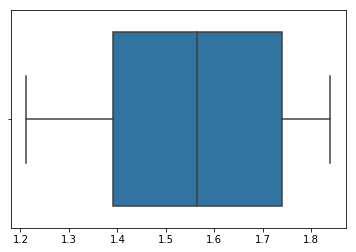

In [ ]:
sns.boxplot(reg_predict)

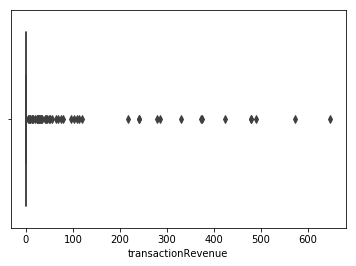

In [ ]:
sns.boxplot(y_test)

C:\Users\Alura Preto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


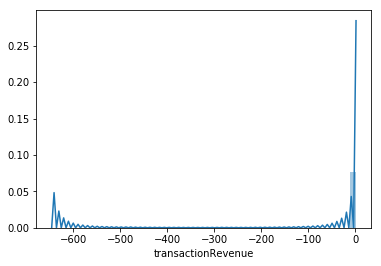

In [ ]:
sns.distplot(reg_predict - y_test)

# Melhorando o Feature Engineering

In [ ]:
visitas_ultima = df.groupby('fullVisitorId',as_index=False)

In [ ]:
visitas_ultima = visitas_ultima['visitNumber'].max()

In [ ]:
visitas_ultima.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,...,isTrueDirect,keyword,medium,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,1.0,1,1.0,1,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,1.0,1,1.0,1,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,desktop,False,...,NaN,NaN,affiliate,NaN,Partners,1.0,1,1.0,1,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,mobile,True,...,True,(not provided),organic,NaN,google,1.0,1,NaN,1,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,mobile,True,...,NaN,(not provided),organic,NaN,google,NaN,5,1.0,4,0.0


In [ ]:
usuarios_visitas_unicos = df.drop_duplicates(subset=['fullVisitorId','visitNumber'])

In [ ]:
usuarios_visitas_unicos.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,...,isTrueDirect,keyword,medium,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,1.0,1,1.0,1,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,1.0,1,1.0,1,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,desktop,False,...,NaN,NaN,affiliate,NaN,Partners,1.0,1,1.0,1,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,mobile,True,...,True,(not provided),organic,NaN,google,1.0,1,NaN,1,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,mobile,True,...,NaN,(not provided),organic,NaN,google,NaN,5,1.0,4,0.0


In [ ]:
usuarios_visitas_unicos.shape

(12270, 31)

In [ ]:
visitas = pd.merge(visitas_ultima,usuarios_visitas_unicos,left_on=['fullVisitorId','visitNumber'],
                  right_on=['fullVisitorId','visitNumber'],how='left')

In [ ]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,deviceCategory,isMobile,...,isTrueDirect,keyword,medium,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,desktop,False,...,NaN,NaN,referral,/yt/about/ru/,youtube.com,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,NaN,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,desktop,False,...,NaN,NaN,referral,/yt/about/,youtube.com,NaN,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,desktop,False,...,NaN,NaN,referral,/yt/about/ro/,youtube.com,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,desktop,False,...,True,NaN,(none),NaN,(direct),NaN,2,NaN,2,0.0


In [ ]:
visitas.shape

(9997, 31)

In [ ]:
visitas_primeira = df.groupby('fullVisitorId',as_index=False)

In [ ]:
visitas_primeira = visitas_primeira['visitNumber'].min()

In [ ]:
visitas_primeira.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [ ]:
visitas_primeira.set_index('fullVisitorId',inplace=True)

In [ ]:
visitas_primeira.head()

,visitNumber
fullVisitorId,
0002365800130207040,1
0010286039787739137,1
0011056874471185769,1
0014443856125569702,1
0017260116665815114,6


In [ ]:
visitas = visitas.join(visitas_primeira,how='left',on='fullVisitorId',rsuffix='_primeira')

In [ ]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,deviceCategory,isMobile,...,keyword,medium,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue,visitNumber_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,desktop,False,...,NaN,referral,/yt/about/ru/,youtube.com,1.0,1,1.0,1,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,desktop,False,...,(not provided),organic,NaN,google,NaN,4,1.0,3,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,desktop,False,...,NaN,referral,/yt/about/,youtube.com,NaN,2,1.0,2,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,desktop,False,...,NaN,referral,/yt/about/ro/,youtube.com,1.0,1,1.0,1,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,desktop,False,...,NaN,(none),NaN,(direct),NaN,2,NaN,2,0.0,6


In [ ]:
visitas = pd.merge(visitas,usuarios_visitas_unicos,left_on=['fullVisitorId','visitNumber_primeira'],
                  right_on=['fullVisitorId','visitNumber'],how='left', suffixes=['_ultima','_primeira'])

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,...,isTrueDirect_primeira,keyword_primeira,medium_primeira,referralPath_primeira,source_primeira,bounces_primeira,hits_primeira,newVisits_primeira,pageviews_primeira,transactionRevenue_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,desktop,False,...,NaN,NaN,referral,/yt/about/ru/,youtube.com,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,desktop,False,...,NaN,(not provided),organic,NaN,google,NaN,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,desktop,False,...,NaN,NaN,referral,/yt/about/,youtube.com,NaN,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,desktop,False,...,NaN,NaN,referral,/yt/about/ro/,youtube.com,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,desktop,False,...,True,NaN,(none),NaN,(direct),NaN,2,NaN,2,0.0


# Limpando a base

In [ ]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [ ]:
for coluna in quant:
    visitas.drop(coluna + '_ultima',axis=1,inplace=True)
    visitas.drop(coluna + '_primeira',axis=1,inplace=True)

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,...,region_primeira,subContinent_primeira,adContent_primeira,campaign_primeira,campaignCode_primeira,isTrueDirect_primeira,keyword_primeira,medium_primeira,referralPath_primeira,source_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,desktop,False,...,not available in demo dataset,Eastern Europe,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/ru/,youtube.com
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,desktop,False,...,Missouri,Northern America,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,desktop,False,...,not available in demo dataset,Southeast Asia,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/,youtube.com
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,desktop,False,...,Bucharest,Eastern Europe,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/ro/,youtube.com
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,desktop,False,...,not available in demo dataset,Northern America,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)


In [ ]:
ids = ['sessionId_ultima','visitId_ultima','sessionId_primeira', 'visitId_primeira']

In [ ]:
visitas.drop(ids,axis=1,inplace=True)

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,operatingSystem_ultima,city_ultima,...,region_primeira,subContinent_primeira,adContent_primeira,campaign_primeira,campaignCode_primeira,isTrueDirect_primeira,keyword_primeira,medium_primeira,referralPath_primeira,source_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,desktop,False,Windows,not available in demo dataset,...,not available in demo dataset,Eastern Europe,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/ru/,youtube.com
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,desktop,False,Chrome OS,Kansas City,...,Missouri,Northern America,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,desktop,False,Windows,not available in demo dataset,...,not available in demo dataset,Southeast Asia,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/,youtube.com
3,0014443856125569702,1,Social,20161002,1475423502,Opera,desktop,False,Windows,Bucharest,...,Bucharest,Eastern Europe,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/ro/,youtube.com
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,desktop,False,Macintosh,not available in demo dataset,...,not available in demo dataset,Northern America,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)


In [ ]:
visitas.columns

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'deviceCategory_ultima', 'isMobile_ultima', 'operatingSystem_ultima',
       'city_ultima', 'continent_ultima', 'country_ultima', 'metro_ultima',
       'networkDomain_ultima', 'region_ultima', 'subContinent_ultima',
       'adContent_ultima', 'campaign_ultima', 'campaignCode_ultima',
       'isTrueDirect_ultima', 'keyword_ultima', 'medium_ultima',
       'referralPath_ultima', 'source_ultima', 'visitNumber_primeira',
       'channelGrouping_primeira', 'date_primeira', 'visitNumber_primeira',
       'visitStartTime_primeira', 'browser_primeira',
       'deviceCategory_primeira', 'isMobile_primeira',
       'operatingSystem_primeira', 'city_primeira', 'continent_primeira',
       'country_primeira', 'metro_primeira', 'networkDomain_primeira',
       'region_primeira', 'subContinent_primeira', 'adContent_primeira',
       'campaign_primeira', 'ca

In [ ]:
geo = ['city_primeira','continent_primeira','country_primeira','metro_primeira','region_primeira',
      'networkDomain_primeira','subContinent_primeira']

In [ ]:
visitas.drop(geo,axis=1,inplace=True)

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,operatingSystem_ultima,city_ultima,...,isMobile_primeira,operatingSystem_primeira,adContent_primeira,campaign_primeira,campaignCode_primeira,isTrueDirect_primeira,keyword_primeira,medium_primeira,referralPath_primeira,source_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,desktop,False,Windows,not available in demo dataset,...,False,Windows,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/ru/,youtube.com
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,desktop,False,Chrome OS,Kansas City,...,False,Chrome OS,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,desktop,False,Windows,not available in demo dataset,...,False,Windows,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/,youtube.com
3,0014443856125569702,1,Social,20161002,1475423502,Opera,desktop,False,Windows,Bucharest,...,False,Windows,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/ro/,youtube.com
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,desktop,False,Macintosh,not available in demo dataset,...,False,Macintosh,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)


# Criando novas variáveis

In [ ]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [ ]:
visitas = pd.merge(visitas,df_quant,left_on=['fullVisitorId'],
                  right_on=['fullVisitorId'],how='left')

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,operatingSystem_ultima,city_ultima,...,isTrueDirect_primeira,keyword_primeira,medium_primeira,referralPath_primeira,source_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,desktop,False,Windows,not available in demo dataset,...,NaN,NaN,referral,/yt/about/ru/,youtube.com,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,desktop,False,Chrome OS,Kansas City,...,NaN,(not provided),organic,NaN,google,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,desktop,False,Windows,not available in demo dataset,...,NaN,NaN,referral,/yt/about/,youtube.com,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,desktop,False,Windows,Bucharest,...,NaN,NaN,referral,/yt/about/ro/,youtube.com,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,desktop,False,Macintosh,not available in demo dataset,...,True,NaN,(none),NaN,(direct),0.0,2,0.0,2,0.0


In [ ]:
visitas['tempo_dif'] = visitas.visitStartTime_ultima - visitas.visitStartTime_primeira

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,operatingSystem_ultima,city_ultima,...,keyword_primeira,medium_primeira,referralPath_primeira,source_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif
0,0002365800130207040,1,Social,20160904,1472974804,Edge,desktop,False,Windows,not available in demo dataset,...,NaN,referral,/yt/about/ru/,youtube.com,1.0,1,1.0,1,0.0,0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,desktop,False,Chrome OS,Kansas City,...,(not provided),organic,NaN,google,0.0,4,1.0,3,0.0,0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,desktop,False,Windows,not available in demo dataset,...,NaN,referral,/yt/about/,youtube.com,0.0,2,1.0,2,0.0,0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,desktop,False,Windows,Bucharest,...,NaN,referral,/yt/about/ro/,youtube.com,1.0,1,1.0,1,0.0,0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,desktop,False,Macintosh,not available in demo dataset,...,NaN,(none),NaN,(direct),0.0,2,0.0,2,0.0,0


In [ ]:
visits = df.groupby('fullVisitorId',as_index=False).count().visitNumber.values

In [ ]:
visits

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [ ]:
visitas['visits'] = visits

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,operatingSystem_ultima,city_ultima,...,medium_primeira,referralPath_primeira,source_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits
0,0002365800130207040,1,Social,20160904,1472974804,Edge,desktop,False,Windows,not available in demo dataset,...,referral,/yt/about/ru/,youtube.com,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,desktop,False,Chrome OS,Kansas City,...,organic,NaN,google,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,desktop,False,Windows,not available in demo dataset,...,referral,/yt/about/,youtube.com,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,20161002,1475423502,Opera,desktop,False,Windows,Bucharest,...,referral,/yt/about/ro/,youtube.com,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,desktop,False,Macintosh,not available in demo dataset,...,(none),NaN,(direct),0.0,2,0.0,2,0.0,0,1


In [ ]:
data = '20160904'

In [ ]:
data

'20160904'

In [ ]:
data[0:4]

'2016'

In [ ]:
data[4:6]

'09'

In [ ]:
data[6:8]

'04'

In [ ]:
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,operatingSystem_ultima,city_ultima,...,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,desktop,False,Windows,not available in demo dataset,...,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,desktop,False,Chrome OS,Kansas City,...,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,desktop,False,Windows,not available in demo dataset,...,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,desktop,False,Windows,Bucharest,...,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,desktop,False,Macintosh,not available in demo dataset,...,2,0.0,0,1,2017,4,20,2017,4,20


In [ ]:
visitas.dtypes

fullVisitorId                object
visitNumber_ultima            int64
channelGrouping_ultima       object
date_ultima                  object
visitStartTime_ultima         int64
browser_ultima               object
deviceCategory_ultima        object
isMobile_ultima                bool
operatingSystem_ultima       object
city_ultima                  object
continent_ultima             object
country_ultima               object
metro_ultima                 object
networkDomain_ultima         object
region_ultima                object
subContinent_ultima          object
adContent_ultima             object
campaign_ultima              object
campaignCode_ultima          object
isTrueDirect_ultima          object
keyword_ultima               object
medium_ultima                object
referralPath_ultima          object
source_ultima                object
visitNumber_primeira          int64
channelGrouping_primeira     object
date_primeira                object
visitNumber_primeira        

# Separando a base de dados

In [ ]:
visitas.drop('fullVisitorId',axis=1,inplace=True)

In [ ]:
y = visitas.transactionRevenue.copy()

In [ ]:
X = visitas.drop('transactionRevenue',axis=1)

In [ ]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,operatingSystem_ultima,city_ultima,continent_ultima,...,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,20160904,1472974804,Edge,desktop,False,Windows,not available in demo dataset,Europe,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,desktop,False,Chrome OS,Kansas City,Americas,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,desktop,False,Windows,not available in demo dataset,Asia,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,desktop,False,Windows,Bucharest,Europe,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,desktop,False,Macintosh,not available in demo dataset,Americas,...,0.0,2,0,1,2017,4,20,2017,4,20


In [ ]:
quali = visitas.dtypes[visitas.dtypes == object].keys()

In [ ]:
quali

Index(['channelGrouping_ultima', 'date_ultima', 'browser_ultima',
       'deviceCategory_ultima', 'operatingSystem_ultima', 'city_ultima',
       'continent_ultima', 'country_ultima', 'metro_ultima',
       'networkDomain_ultima', 'region_ultima', 'subContinent_ultima',
       'adContent_ultima', 'campaign_ultima', 'campaignCode_ultima',
       'isTrueDirect_ultima', 'keyword_ultima', 'medium_ultima',
       'referralPath_ultima', 'source_ultima', 'channelGrouping_primeira',
       'date_primeira', 'browser_primeira', 'deviceCategory_primeira',
       'operatingSystem_primeira', 'adContent_primeira', 'campaign_primeira',
       'campaignCode_primeira', 'isTrueDirect_primeira', 'keyword_primeira',
       'medium_primeira', 'referralPath_primeira', 'source_primeira'],
      dtype='object')

# Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
strings = list(X.operatingSystem_ultima.values.astype('str'))

In [ ]:
lbl = LabelEncoder()

In [ ]:
lbl.fit(strings)

LabelEncoder()

In [ ]:
lbl.transform(strings)

array([ 9,  3,  9, ..., 11,  1,  9], dtype=int64)

In [ ]:
for coluna in quali:
    lbl = LabelEncoder()
    strings = list(X[coluna].values.astype('str'))
    lbl.fit(strings)
    X[coluna] = lbl.transform(strings)

C:\Users\Alura Preto\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,deviceCategory_ultima,isMobile_ultima,operatingSystem_ultima,city_ultima,continent_ultima,...,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,0,False,9,286,4,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,0,False,3,120,2,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,0,False,9,286,3,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,0,False,9,37,4,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,0,False,6,286,2,...,0.0,2,0,1,2017,4,20,2017,4,20


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Regressão linear

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
reg_predict = reg.predict(X_test)

In [ ]:
reg_predict[reg_predict < 0] = 0

In [ ]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [ ]:
resultados.head()

,revenue,predict,erro
4122,0.0,0.081534,0.081534
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.478034,0.478034
6391,0.0,0.000000,0.000000


In [ ]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.505124,-17.984876
5928,74.85,36.134350,-38.715650
8361,424.50,18.393429,-406.106571
8612,55.99,16.464665,-39.525335
416,15.19,22.497453,7.307453
4077,5.97,15.257141,9.287141
8146,27.19,13.450182,-13.739818
4908,372.65,129.532697,-243.117303
9395,29.98,20.454685,-9.525315
8728,101.95,89.091395,-12.858605


In [ ]:
np.sqrt(mean_squared_error(y_test,reg_predict))

25.019664401929614

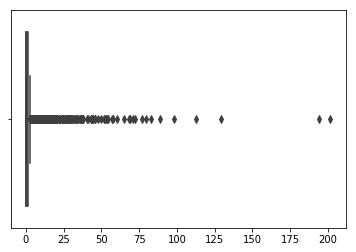

In [ ]:
sns.boxplot(reg_predict)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(random_state=42)

In [ ]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gb_predict = gb.predict(X_test)

In [ ]:
gb_predict

array([ 0.02242292, -0.01680662, -0.02201891, ...,  0.32247215,
       -0.02453552, -0.02388993])

In [ ]:
gb_predict[gb_predict < 0 ] = 0

In [ ]:
gb_predict

array([0.02242292, 0.        , 0.        , ..., 0.32247215, 0.        ,
       0.        ])

In [ ]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = gb_predict
resultados['erro'] = gb_predict - y_test

In [ ]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.505124,-17.984876
5928,74.85,36.134350,-38.715650
8361,424.50,18.393429,-406.106571
8612,55.99,16.464665,-39.525335
416,15.19,22.497453,7.307453
4077,5.97,15.257141,9.287141
8146,27.19,13.450182,-13.739818
4908,372.65,129.532697,-243.117303
9395,29.98,20.454685,-9.525315
8728,101.95,89.091395,-12.858605


In [ ]:
np.sqrt(mean_squared_error(y_test,gb_predict))

23.65957072035255